In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
import scipy.stats as stats
import math

In [2]:
#zad1

In [3]:
wyniki = pd.read_csv(r'C:\Users\dell\Desktop\bartus_pytong\wyniki.csv')
wyniki

,plec,ocena_koncowa
0,F,6
1,F,6
2,F,10
3,F,15
4,F,10
...,...,...
352,M,9
353,M,16
354,M,7
355,M,10


In [4]:
wyniki.loc[:,'plec'] = wyniki.loc[:,'plec'].replace('F',0).replace('M',1).astype(int)
wyniki

,plec,ocena_koncowa
0,0,6
1,0,6
2,0,10
3,0,15
4,0,10
...,...,...
352,1,9
353,1,16
354,1,7
355,1,10


In [5]:
wyniki_k = wyniki[wyniki['plec']==0]
wyniki_m = wyniki[wyniki['plec']==1]
k = len(wyniki_k)
m = len(wyniki_m)
print(k,m)

185 172


In [6]:
srednia_k = wyniki_k['ocena_koncowa'].mean()
srednia_m = wyniki_m['ocena_koncowa'].mean()
std_k = wyniki_k['ocena_koncowa'].std()
std_m = wyniki_m['ocena_koncowa'].std()

In [7]:
t_stat = (srednia_k-srednia_m)/math.sqrt(std_k**2/k+std_m**2/m)
t_stat

-1.9386213026002415

In [8]:
df = m - 1
p = stats.t.sf(abs(t_stat), df = df)
p

0.027096993707504537

In [9]:
#P-value jest mniejsze od significance level. Oznacza to, że hipotezę zerową można odrzucić.

In [10]:
#zad2

In [11]:
zyski = pd.read_csv(r'C:\Users\dell\Desktop\bartus_pytong\ZyskiFirmyX.csv')

In [12]:
zyski

,Rok,Zysk
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
195,2016,988
196,2017,895
197,2018,-178
198,2019,543


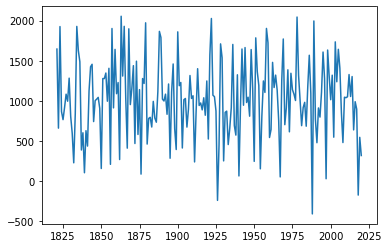

In [13]:
plt.plot(zyski['Rok'],zyski['Zysk'])

In [14]:
#Na pierwszy rzut oka ciężko jest zauważyć trend. Z danych poniżej widzimy jednak, że trend jest malejący (a = -0.1832)

In [15]:
model = smf.ols(formula = "Zysk ~ Rok", data = zyski).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Zysk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.09357
Date:                Tue, 17 Jan 2023   Prob (F-statistic):              0.760
Time:                        22:45:51   Log-Likelihood:                -1521.3
No. Observations:                 200   AIC:                             3047.
Df Residuals:                     198   BIC:                             3053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1373.8795   1150.888      1.194      0.2

In [16]:
#zad3

In [17]:
ss = pd.read_csv(r'C:\Users\dell\Desktop\bartus_pytong\spendingscores.csv')

In [18]:
ss

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [19]:
ss.loc[:,'Gender'] = ss.loc[:,'Gender'].replace('Female',0).replace('Male',1).astype(int)
ss

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [20]:
model1 = smf.ols(formula = "SpendingScore ~ Gender + Age + AnnualIncome", data = ss).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           4.91e-05
Time:                        22:45:58   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       73.9300      6.642     11.130   

In [21]:
print("Model P Values:", model1.pvalues.values)
print("Model Coef:", model1.params.values)
print("Model Std Errs:", model1.bse.values)

Model P Values: [1.28775203e-22 5.67117187e-01 3.05517724e-06 9.05093933e-01]
Model Coef: [ 7.39300336e+01 -2.01323375e+00 -6.00371040e-01  7.92939510e-03]
Model Std Errs: [6.64225287 3.51182541 0.12491583 0.06641961]


In [22]:
ss.corr()

,Gender,Age,AnnualIncome,SpendingScore
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
AnnualIncome,0.056410,-0.012398,1.000000,0.009903
SpendingScore,-0.058109,-0.327227,0.009903,1.000000


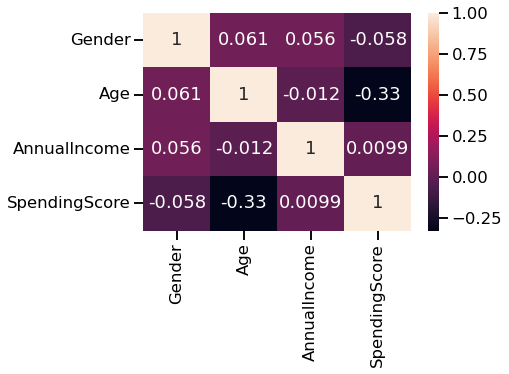

In [23]:
sns.set_context('talk')
ax = sns.heatmap(ss.corr(), annot=True)

In [24]:
model2 = smf.ols(formula = "SpendingScore ~ Gender", data = ss).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6708
Date:                Tue, 17 Jan 2023   Prob (F-statistic):              0.414
Time:                        22:46:05   Log-Likelihood:                -933.21
No. Observations:                 200   AIC:                             1870.
Df Residuals:                     198   BIC:                             1877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.5268      2.442     21.099      0.0

In [25]:
model3 = smf.ols(formula = "SpendingScore ~ Age", data = ss).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     23.74
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           2.25e-06
Time:                        22:46:06   Log-Likelihood:                -922.22
No. Observations:                 200   AIC:                             1848.
Df Residuals:                     198   BIC:                             1855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.7012      5.124     14.384      0.0

In [26]:
model4 = smf.ols(formula = "SpendingScore ~ AnnualIncome", data = ss).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01942
Date:                Tue, 17 Jan 2023   Prob (F-statistic):              0.889
Time:                        22:46:06   Log-Likelihood:                -933.53
No. Observations:                 200   AIC:                             1871.
Df Residuals:                     198   BIC:                             1878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       49.6104      4.610     10.761   

In [27]:
#Najmniej wpływowyn parametrem jest płeć (najmniejsza Adj. R-squared) więc jej nie uwzględniam w dalszym modelowaniu.

In [28]:
model5 = smf.ols(formula = "SpendingScore ~ Age + AnnualIncome", data = ss).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:          SpendingScore   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     11.82
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           1.42e-05
Time:                        22:46:08   Log-Likelihood:                -922.21
No. Observations:                 200   AIC:                             1850.
Df Residuals:                     197   BIC:                             1860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       73.3479      6.553     11.193   